<a href="https://colab.research.google.com/github/CarlinaPasini/Checkpoint-Data-SoyHenry/blob/main/trabajo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Simulación (ejercicio a entregar)***
Armar una simulación basada en N=100 repeticiones que permita estimar el promedio de paquetes necesarios para conseguir llenar el álbum de figuritas del Mundial Qatar 2022. [OPCIONAL] Si es posible, representar el histograma de la cantidad de paquetes necesarios para completar el álbum a partir de la simulación. Puede usarse import seaborn as sns y sns.histplot().

A diferencia de la resolución a mano, aquí propondremos una versión más realista: el álbum del Mundial Qatar 2022 tiene figus_total=860 y vamos a suponer que el paquete no trae una figurita, sino varias: figus_paquete=5. Además, Panini, empresa creadora del álbum del Mundial Qatar 2022, asegura que NO vienen figuritas repetidas por paquete. Para resolver este problema, podés optar por simularlo de acuerdo con esto que asegura Panini, o no. Es tu elección.

[PISTAS] Para la construcción de la simulación, se sugiere la siguiente estructura, ya que no hemos estimado otra cosa que no sean probabilidades y, para este problema, necesitamos estimar una esperanza.

Para el armado del bullet "1. Experimento aleatorio", definir la función cuantos_paquetes(figus_total, figus_paquete) que dado el tamaño del álbum (figus_total) y la cantidad de figuritas por paquete (figus_paquete) genere un álbum nuevo, simule su llenado y devuelva cuántos paquetes se debieron comprar para completarlo.
Para el armado del bullet "2: Muestra aleatoria", definir una semilla, fijar N y armar N=100 muestras de cuantos_paquetes(figus_total, figus_paquete) que se guarden en muestras.
En esta instancia, como vimos, estaríamos armando el bullet "3: Una función filtro que caracteriza el evento E" para luego estimar P(E) por la frecuencia relativa de su aparición en las N muestras. Sin embargo, aquí no hay evento para estimar: lo que queremos estimar es una esperanza. Para hacerlo, la aproximaremos por su promedio muestral, es decir, por el promedio de lo observado en muestras. Para ello, podés usar el comando np.mean(muestras). Esto nos dará una estimación del promedio de paquetes necesarios para completar un álbum del Mundial Qatar 2022 a partir de una simulación de N replicaciones.
[SUGERENCIA PARA EL BULLET 1] Armar la función cuantos_paquetes(figus_total, figus_paquete) puede ser desafiante. Te compartimos una posible estructura que puede ayudarte a implementarla.

Implementá una función crear_album(figus_total) para crear un vector album que tenga un total de figus_total ceros. Es decir, vamos a representar al álbum por un vector en el que cada posición representa el estado de una figurita con dos valores: 0, para indicar que aún no la conseguimos, y 1, para indicar que sí. El álbum se inicia con todas sus posiciones en 0, hasta que empezamos a comprar figuritas y pegarlas.

Implementá una función comprar_paquete(figus_total,figus_paquete) que, dada la cantidad de figuritas por paquete (figus_paquete), genere un paquete (lista) de figuritas al azar. Si respetamos lo que afirma Panini de que no hay figuritas repetidas por paquete, usá el comando rd.sample, ya que estaremos tomando una muestra de figuritas sin reposición.

Implementá la función pegar_figus(album,paquete) que complete con un 1 las figuritas del álbum que te hayan tocado. Recordá que los vectores se indexan desde 0, entonces, te va a convenir que la posición [i] del album toma el valor 1 si alguno de los elementos de la lista figus contiene al valor i. Pero, para eso, generá las figuritan en range(0,figus_total), es decir, figuritas que toman valores de 0 hasta figus_total-1. Lo importante es que aquellas figuritas que no te hayan tocado conserven el 0 en la posición correspondiente del vector album. En este problema, no abordamos la complejidad que significaría intercambian y considerar todas las repetidas que podés tener.

Implementá la función album_incompleto(album) que recibe un vector album y devuelve True si el álbum A no está completo y False si lo está. Recordá que un álbum estará incompleto siempre que haya al menos un cero en alguna de sus posiciones.

Por último, utilizá todas estas funciones para crear una única función que las invoque y que se llame cuantos_paquetes(figus_total, figus_paquete) que cuente la cantidad de paquetes necesarios hasta completar el álbum. Necesitarás usar la estructura de control while(), pues comprarás paquetes mientras el álbum siga incompleto; y deberás generar un contador de paquetes_comprados que arranque en 0 y sume un 1 cada vez que compres un nuevo paquete.

Promedio de paquetes necesarios: 1256.48


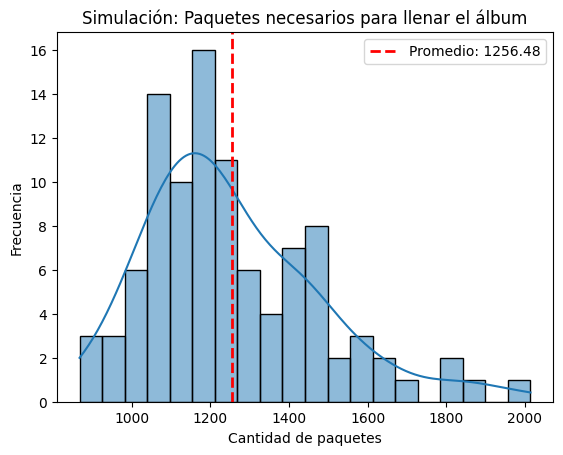

In [ ]:
import random as rd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Función para crear el álbum vacío con figus_total ceros
# 0: figurita no encontrada
# 1: figurita encontrada
def crear_album(figus_total):
    return np.zeros(figus_total, dtype=int)

# Función para comprar un paquete
# Dada figus_paquete generar un paquete(lista) de figuritas al azar
# Según Panini, paquete de figuritas sin repetición.
def comprar_paquete(figus_total, figus_paquete):
    return rd.sample(range(figus_total), figus_paquete)

# Función para pegar las figuritas del paquete en el álbum
# Se indica con un 1.
def pegar_figus(album, paquete):
    for figu in paquete:
        album[figu] = 1
    return album

# Función para verificar si el álbum está incompleto
def album_incompleto(album):
    return np.any(album == 0)

# Función que cuenta la cantidad de paquetes necesarios para llenar el álbum
# Simular el llenado del álbum
def cuantos_paquetes(figus_total, figus_paquete):
    # Vector album todo en cero
    album = crear_album(figus_total)
    paquetes_comprados = 0
    # Mientras el álbum está incompleto
    while album_incompleto(album):
        paquete = comprar_paquete(figus_total, figus_paquete)
        pegar_figus(album, paquete)
        paquetes_comprados += 1
    return paquetes_comprados

# Simulación con N repeticiones
def simular_lleno_album(figus_total, figus_paquete, N):
    muestras = [cuantos_paquetes(figus_total, figus_paquete) for _ in range(N)]
    return muestras

# Parámetros
# Fijamos una semilla para que todo sea reproducible
rd.seed(123)
figus_total = 860
figus_paquete = 5
N = 100

# Simulación
muestras = simular_lleno_album(figus_total, figus_paquete, N)

# Calcular el promedio de paquetes
promedio_paquetes = np.mean(muestras)
print("Promedio de paquetes necesarios:", promedio_paquetes)

# Graficar el histograma con la línea del promedio
sns.histplot(muestras, bins=20, kde=True)
plt.axvline(promedio_paquetes, color='r', linestyle='dashed', linewidth=2, label=f'Promedio: {promedio_paquetes:.2f}')
plt.title('Simulación: Paquetes necesarios para llenar el álbum')
plt.xlabel('Cantidad de paquetes')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()